# Imports / Values

Welcome! Please type in a potential target's RA and Dec (in the form RA:[h m s] and Dec:[° ′ ″]): 
RA -> 12 51 00
Dec -> -06 23 00 

RA [h m s]: 12 51 00
DEC [° ′ ″]: -06 23 00 
Galactic longitude:  302d44m05.509s
Galactic latitude:  56d29m17.6881s

-------------------------------------------------------------------------


C:\Users\Taylah\Anaconda3\lib\site-packages\astroquery\utils\commons.py:187: UserWarning: Coordinate string is being interpreted as an ICRS coordinate.
  warnings.warn("Coordinate string is being interpreted as an "


INFO: Red: [aplpy.rgb]
INFO: vmin =  3.978e+03 (auto) [aplpy.rgb]
INFO: vmax =  8.201e+03 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  2.849e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.092e+04 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  3.791e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.014e+04 (auto) [aplpy.rgb]


C:\Users\Taylah\Anaconda3\lib\site-packages\aplpy\rgb.py:218: UserWarning: PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image
  warnings.warn("PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image")



-------------------------------------------------------------------------

DUST (Standard Deviation):  0.00358682260735
DUST (Mean):  0.0305539275505
DUST (Min):  0.020738130586
DUST (Max):  0.0446360672164



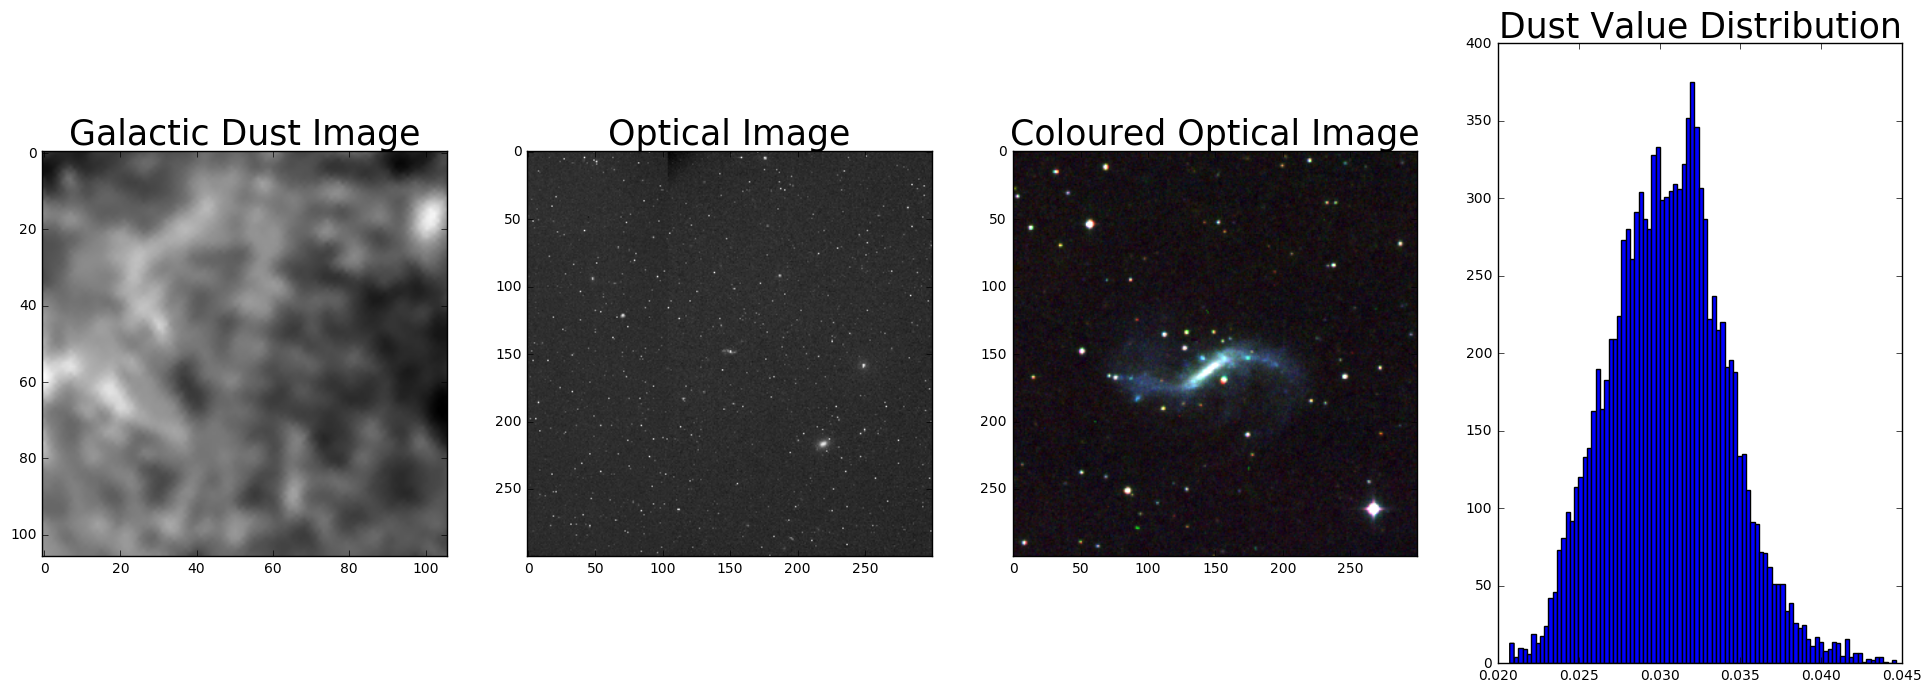

In [77]:
"""IMPORTS"""
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.irsa_dust import IrsaDust
import astropy.units as u
from astroquery.skyview import SkyView

from astropy.io import fits as pyfits
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline
#!pip install aplpy
import aplpy
import numpy as np
import os



"""INPUT"""
print ("Welcome! Please type in a potential target's RA and Dec (in the form RA:[h m s] and Dec:[° ′ ″]): ")
RA_DEC = (input("RA -> "),input("Dec -> "))


"""RA and DEC"""
print ()
print ("RA [h m s]:",RA_DEC[0])
print ("DEC [° ′ ″]:",RA_DEC[1])


"""This is the conversion from the inputed RA and Dec into the units of degrees. Then, through the '.galactic', l and b are found"""
lb=SkyCoord('%s %s'%(RA_DEC[0], RA_DEC[1]), unit=(u.hourangle,u.deg))
l_b = lb.galactic
print ("Galactic longitude: ", l_b.l)
print ("Galactic latitude: ", l_b.b)

print ()
print ("-------------------------------------------------------------------------")
print ('Downloading Relevant Images: ')

"""DUST"""
dust_map = IrsaDust.get_images("%s %s" %(lb.ra, lb.dec), image_type="ebv", radius=2.6 * u.deg)
"""creating arrays"""
dust=[]
for f in dust_map:
    dust.append(np.array((f)[0].data, dtype=float))


"""OPTICAL IMAGES"""
path = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS'], radius=2.6 * u.deg)
"""creating arrays"""
optical=[]
for f in path:
    optical.append(np.array((f)[0].data, dtype=float))

"""COLOURED OPTICAL IMAGE"""
pathr = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS1 Red'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalr=[]
for f in pathr:
    opticalr.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathr.fit",opticalr[0],clobber=True)

pathb = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS1 Blue'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalb=[]
for f in pathb:
    opticalb.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathb.fit",opticalb[0],clobber=True)

pathIR = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS2 IR'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalIR=[]
for f in pathIR:
    opticalIR.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathIR.fit",opticalIR[0],clobber=True)
"""Saving coloured Image"""
aplpy.make_rgb_image(['pathIR.fit','pathr.fit','pathb.fit'], 'RGB.png')

print ()
print ("-------------------------------------------------------------------------")
print ()


"""DUST VALUES"""
print ("DUST (Standard Deviation): ", np.std(dust[0]))
print ("DUST (Mean): ", np.mean(dust[0]))
print ("DUST (Min): ", np.min(dust[0]))
print ("DUST (Max): ", np.max(dust[0]))
print ()


"""PLOTS!"""
fig,ax = plt.subplots(ncols=4,figsize=(24,8))
plot = ax[0].imshow(dust[0].data,cmap='gray')
ax[0].set_title('Galactic Dust Image', fontsize=25)

plot1 = ax[1].imshow(optical[0].data,cmap='gray')
ax[1].set_title('Optical Image', fontsize=25)

plot2 = ax[3].hist(dust[0].flatten(),bins = 90)
ax[3].set_title('Dust Value Distribution', fontsize=25)

plot3 = ax[2].imshow(mpimg.imread('RGB.png'))
ax[2].set_title('Coloured Optical Image', fontsize=25)

"""Removing RGB file so this code can run continuously"""
os.remove('RGB.png')